# Taller # 2 - Ciencia de Datos

Oscar Javier Angel Balcázar

**Objetivo**
Evaluar las capacidades del estudiante para desarrollar modelos analíticos supervisados contemplando las etapas de la metodología ASUM-DM, como son el análisis y entendimiento de los datos, preparación de datos, creación de modelos, evaluación y análisis de resultados.

**Descripción**

La alcaldía de una ciudad está interesada en implementar un nuevo servicio de patinetas para incentivar la movilidad sostenible y como parte de este proceso se encuentra evaluando la viabilidad económica e impacto de dicho servicio. Dado lo anterior, le ha encargado a la consultora Andes CDA el desarrollo de un modelo predictivo de la demanda de patinetas por día con base en datos de una ciudad vecina. Su objetivo como consultor de esta empresa es la creación del mejor modelo posible de regresión lineal que le permita predecir el número de usuarios promedio por día del nuevo servicio, al mismo tiempo de poder entender la importancia y relación de las variables consideradas. A continuación, se relaciona el diccionario de datos:

| Instant |	Record Index |
|---------|--------------|
| Date | Date (Format: YYYY-MM-DD) |
| Season |	Season of the year |
| Holiday |	Is it holiday? |
| Weather |	Description of the weather situation |
| Temp | Temperature in Celsius |
| Feel_Temp | Feeling temperature in Celsius |
| Hum |	Normalized humidity |
| Wind | Wind speed in m/s |
| Casual | Count of casual users |
| Registered |	Count of   registered users |
| cnt |	Count of total rental bikes including both casual and registered |


**Actividades**

Responda cada una de las preguntas de negocio utilizando las técnicas y
herramientas vistas en clase. En la medida de lo posible, responda cada pregunta
aplicando una técnica estadística acompañada de una visualización.

##### **Importando librerías.**

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 146 kB/s
     |████████████████████████████████| 297 kB 7.7 MB/s 
     |████████████████████████████████| 102 kB 76.4 MB/s 
     |████████████████████████████████| 690 kB 64.1 MB/s 
     |████████████████████████████████| 4.7 MB 67.3 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 9.8 MB 56.1 MB/s 
     |████████████████████████████████| 296 kB 69.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.1-py2.py3-none-any.whl size=310107 sha256=9a6091163cb74c5cb2de4fa076737d4cd2ac1514c857c8a29487ae25e7ccdbad
  Stored in directory: /tmp/pip-ephem-wheel-cache-ytqnz5k5/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=06e49a83ed3944e5627661a837752542330cfd11416aefa339f8dcaa1adbd0f3
  Stored in director

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import csv
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

####  **Lectura del DataSet**

In [3]:
# Loading the CSV file as dataframe
pd.set_option('display.max_rows', None)
movilidad_df = pd.read_csv('https://raw.githubusercontent.com/ojangelb/MINE-4101/main/Taller_2/dataset/Data_Taller_2.csv', delimiter=";")


### Limpieza y preparación de los Datos

In [4]:
# The record with the wrong date is deleted.
index = movilidad_df[(movilidad_df.Date == '29/02/2021')].index

# Special characters are replaced and the Holiday column is converted to binary
movilidad_df = movilidad_df.drop(index)
movilidad_df['Temp'] = movilidad_df['Temp'].str.replace(',', '.')
movilidad_df['Feel_Temp'] = movilidad_df['Feel_Temp'].str.replace(',', '.')
movilidad_df['Hum'] = movilidad_df['Hum'].str.replace(',', '.')
movilidad_df['Wind'] = movilidad_df['Wind'].str.replace(',', '.')
movilidad_df['Holiday'] = movilidad_df['Holiday'].str.replace('Yes', '1').str.replace('No', '0')
movilidad_df.shape

(730, 12)

In [5]:
# The text string is converted to a date and with this the day of the week is returned in a new column
movilidad_df['Date'] = pd.to_datetime(movilidad_df['Date'])
movilidad_df['day_of_week'] = movilidad_df['Date'].dt.dayofweek

According to the suggestion of the meteorologist, the following grouping of the climate was carried out

1. Mist will be replace by 0

  Mist + Cloudy \
Mist \
Mist + Broken clouds \
Mist + Few clouds \

2. Rain will be replace by 1 \
Rain + Thunderstorm \
Light Rain + Scattered clouds \

3. Other will be replace by 2 \
Few clouds \
Partly    cloudy \
Clear \
Partly cloudy \
Snow \

In [6]:
movilidad_df['Weather'].unique()

array(['Mist + Cloudy', 'Few clouds', ' Partly    cloudy', 'Clear',
       'Mist', 'Mist + Broken clouds', ' Partly cloudy',
       'Mist + Few clouds', 'Rain + Thunderstorm',
       'Light Rain + Scattered clouds', 'Snow'], dtype=object)

In [7]:
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace("+", '').str.replace(" ", '')
movilidad_df['Weather_num'] = movilidad_df['Weather']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [8]:
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace("MistCloudy", 'Mist')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace("MistBrokenclouds", 'Mist')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace("MistBrokenclouds", 'Mist')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace("MistFewclouds", 'Mist')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace('Mist', 'Mist')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace('RainThunderstorm', 'Rain')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace('LightRainScatteredclouds', 'Rain')

movilidad_df['Weather'] = movilidad_df['Weather'].str.replace('Fewclouds', 'Other Weather')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace('Partlycloudy', 'Other Weather')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace('Clear', 'Other Weather')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace('Partlycloudy', 'Other Weather')
movilidad_df['Weather'] = movilidad_df['Weather'].str.replace('Snow', 'Other Weather')


In [9]:

movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace("MistCloudy", '0')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace("MistBrokenclouds", '0')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace("MistBrokenclouds", '0')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace("MistFewclouds", '0')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace('Mist', '0')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace('RainThunderstorm', '1')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace('LightRainScatteredclouds', '1')

movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace('Fewclouds', '2')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace('Partlycloudy', '2')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace('Clear', '2')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace('Partlycloudy', '2')
movilidad_df['Weather_num'] = movilidad_df['Weather_num'].str.replace('Snow', '2')

In [10]:
movilidad_df['Weather_num'].unique()

array(['0', '2', '1'], dtype=object)

In [11]:
# Set data types in Dataframe
movilidad_df = movilidad_df.astype({'Holiday': np.int0,'Weather_num': np.int0,'Temp': np.float64, 'Feel_Temp': np.float64, 'Hum': np.float64, 'Wind': np.float64})

In [12]:
movilidad_df.dtypes

instant                 int64
Date           datetime64[ns]
Season                 object
Holiday                 int64
Weather                object
Temp                  float64
Feel_Temp             float64
Hum                   float64
Wind                  float64
Casual                  int64
Registered              int64
cnt                     int64
day_of_week             int64
Weather_num             int64
dtype: object

In [13]:
movilidad_df.isnull().sum()

instant        0
Date           0
Season         0
Holiday        0
Weather        0
Temp           4
Feel_Temp      0
Hum            0
Wind           0
Casual         0
Registered     0
cnt            0
day_of_week    0
Weather_num    0
dtype: int64

In [14]:
# Fields with null values ​​are filled
movilidad_df['Temp'].fillna(movilidad_df['Feel_Temp'] -0.8, inplace=True)

In [15]:
# The outlier in temperature is corrected
movilidad_df['Validate_Temp'] = movilidad_df['Temp'] - movilidad_df['Feel_Temp']
movilidad_temp = movilidad_df[(movilidad_df.Validate_Temp > 10) | (movilidad_df.Validate_Temp < -10)]
movilidad_temp

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,day_of_week,Weather_num,Validate_Temp
594,595,2021-08-17,Fall,0,Other Weather,25.996651,3.3928,0.570833,15.500718,1483,5665,7148,1,2,22.603851


In [16]:
movilidad_df.loc[movilidad_df['instant'] == 595, ['Feel_Temp']] = 22.8

Se realizó imputación de valores a un dato atipico que se detalla en la nota 1

In [17]:
movilidad_df.loc[movilidad_df['instant'] == 568, ['Casual']] = 153
movilidad_df.loc[movilidad_df['instant'] == 568, ['Registered']] = 1689
movilidad_df.loc[movilidad_df['instant'] == 568, ['cnt']] = 1842

In [18]:
movilidad_df.head(10)

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,day_of_week,Weather_num,Validate_Temp
0,1,2020-01-01,Springer,0,Mist,8.175849,9.090375,0.805833,10.749882,331,654,985,2,0,-0.914526
1,2,2020-02-01,Springer,0,Mist,9.083466,8.625733,0.696087,-16.652113,131,670,801,5,0,0.457733
2,3,2020-03-01,Springer,0,Other Weather,1.229108,0.902035,0.437273,16.636703,120,1229,1349,6,2,0.327073
3,4,2020-04-01,Springer,0,Other Weather,1.400000,1.969734,0.590435,10.739832,108,1454,1562,2,2,-0.569734
4,5,2020-05-01,Springer,0,Other Weather,2.666979,2.775690,0.436957,12.522300,82,1518,1600,4,2,-0.108711
5,6,2020-06-01,Springer,0,Other Weather,1.604356,2.960823,0.518261,6.000868,88,1518,1606,0,2,-1.356467
6,7,2020-07-01,Springer,0,Mist,1.236534,1.815433,0.498696,11.304642,148,1362,1510,2,0,-0.578899
7,8,2020-08-01,Springer,0,Mist,-0.245000,-0.374062,0.535833,17.875868,68,891,959,5,0,0.129062
8,9,2020-09-01,Springer,0,Other Weather,-1.498349,-2.539775,0.434167,24.250650,54,768,822,1,2,1.041426
9,10,2020-10-01,Springer,0,Other Weather,-0.910849,-0.908264,0.482917,14.958889,41,1280,1321,3,2,-0.002585


In [19]:
movilidad_df = movilidad_df.drop(['Validate_Temp'], axis=1)

### Análisis Exploratorio de Datos

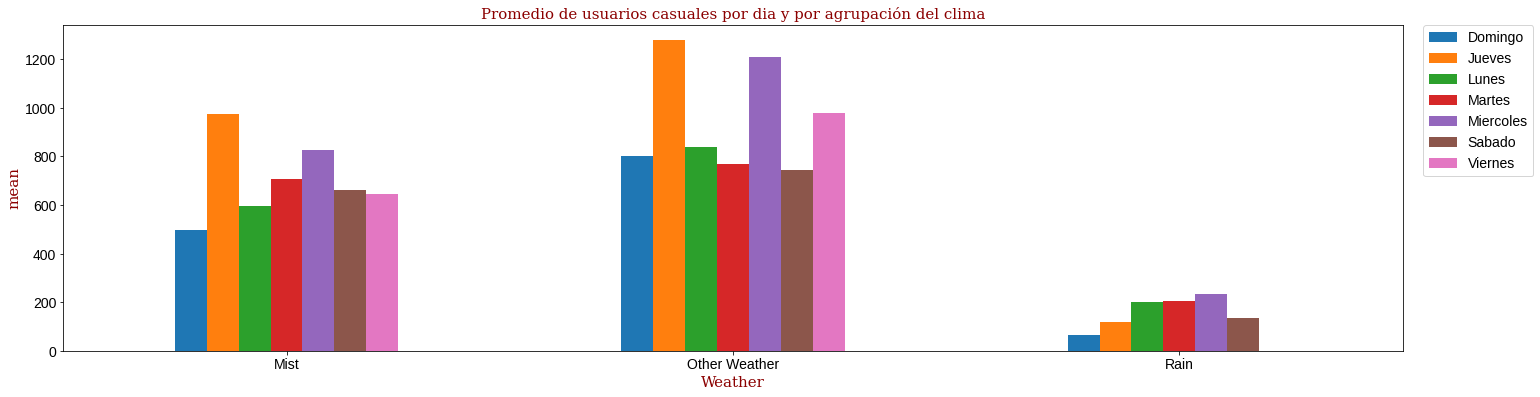

In [20]:
top_day_weather_casual = movilidad_df.groupby(['Weather','day_of_week']).agg({'Casual': ['mean']})
top_day_weather_casual.reset_index(inplace=True)
top_day_weather_casual.columns = ['Weather','day_of_week','mean']
top_day_weather_casual['day_of_week'] = top_day_weather_casual['day_of_week'].replace(0,'Lunes').replace(1,'Martes').replace(2,'Miercoles').replace(3,'Jueves').replace(4,'Viernes').replace(5,'Sabado').replace(6,'Domingo')

# transform the shape
dfp = top_day_weather_casual.pivot(index='Weather', columns='day_of_week', values='mean')

# plot
ax = dfp.plot(kind='bar', rot=0, figsize=(24, 6))
font = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Weather", font)
plt.ylabel("mean", font)
plt.title("Promedio de usuarios casuales por dia y por agrupación del clima", font)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', fontsize=14)
plt.style.use('seaborn')
plt.tick_params(labelsize=14)
plt.show()

En los grupos de clima de niebla y otros climas (Pocas nubes, Parcialmente nublado, Claro, Parcialmente nublado y Nieve) se obaserva que los días Jueves, Miercoles son los dias en los cuales se rentan más patinetas. En días con niebla los Domingos y los Lunes son los días que se rentan menos, con un comportamiento casi similar en la otra categoria de clima. En los dias lluviosos casi no se rentan patinetas.

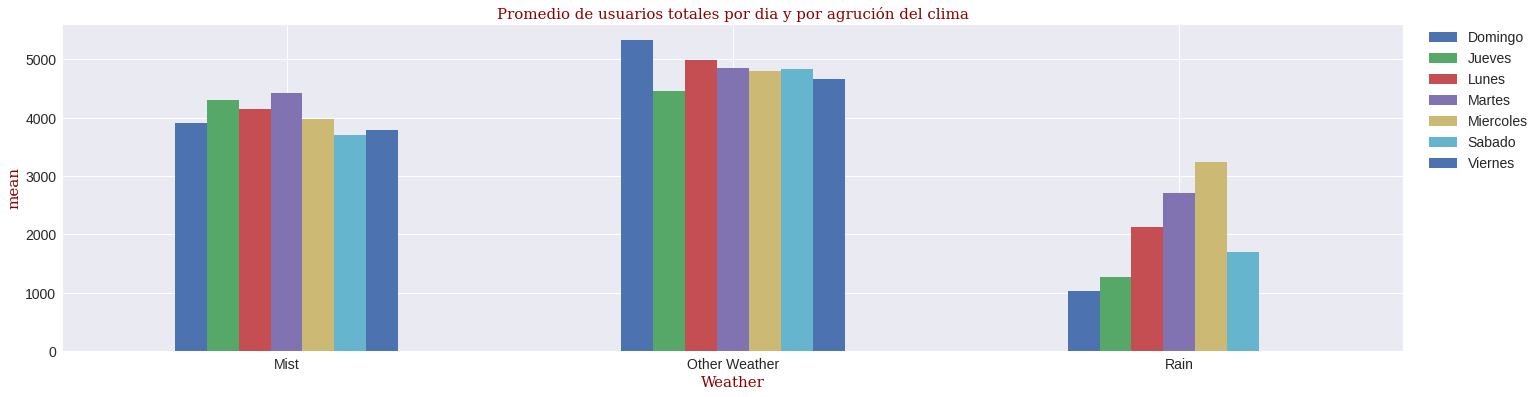

In [21]:
top_day_weather = movilidad_df.groupby(['Weather','day_of_week']).agg({'cnt': ['mean']})
top_day_weather.reset_index(inplace=True)
top_day_weather.columns = ['Weather','day_of_week','mean']
top_day_weather['day_of_week'] = top_day_weather['day_of_week'].replace(0,'Lunes').replace(1,'Martes').replace(2,'Miercoles').replace(3,'Jueves').replace(4,'Viernes').replace(5,'Sabado').replace(6,'Domingo')

# transform the shape
dfp = top_day_weather.pivot(index='Weather', columns='day_of_week', values='mean')

# plot
ax = dfp.plot(kind='bar', rot=0, figsize=(24, 6))
font = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Weather", font)
plt.ylabel("mean", font)
plt.title("Promedio de usuarios totales por dia y por agrución del clima", font)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', fontsize=14)
plt.style.use('seaborn')
plt.tick_params(labelsize=14)
plt.show()

Un factor determinante para rentar las patinetas es el clima, por ejemplo en días con lluvia se ve que el uso de este medio de trasporte es menor comparado con la agrupación de *otros climas* que corresponde a dias soleados, con poca nubosidad o nieve. Tambien en la gráfica se observa que los dias con niebla disminuye un poco los viajes en este tipo de transporte.

In [22]:
cnt_date = movilidad_df[(movilidad_df['Date'] > '2021-06-30')]
cnt_date['cnt'] = cnt_date['cnt']/1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



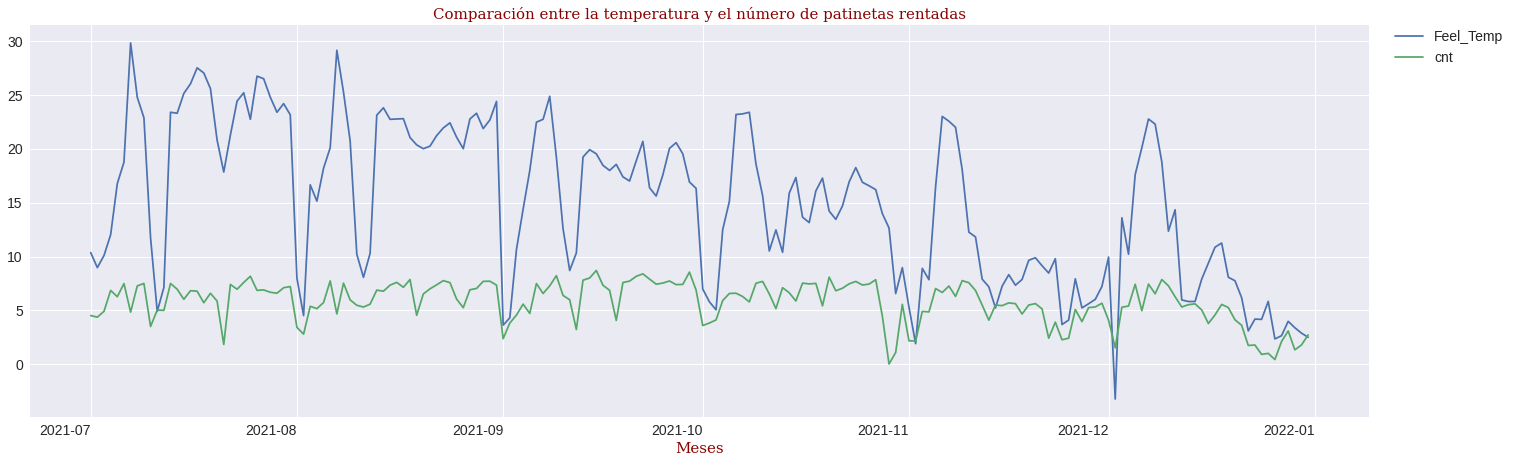

In [23]:

ax = plt.gca()
cnt_date.plot(kind='line', x='Date', y='Feel_Temp', rot=0, figsize=(24, 8), ax=ax)
cnt_date.plot(kind='line', x='Date', y='cnt', rot=0, figsize=(24, 8), ax=ax)
font = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Meses", font)
plt.title("Comparación entre la temperatura y el número de patinetas rentadas", font)
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left', fontsize=14)
plt.style.use('seaborn')
plt.tick_params(labelsize=14)
plt.show()

En la anterior gráfica se observa que a menor temperatura menor número de viajes en patineta, por ejemplo en la parte derecha de la gráfica cuando incia el invierno la cantidad de viajes baja como lo hace la temperatura. Si la curva de la temperatura sube  el número de patinetas rentado tambien es mayor.

## Desarrollo de modelos de Machine Learning 

### 1. Regresión Lineal

Variables para entrenar el modelo

In [24]:
features = ['Holiday','Weather_num','Feel_Temp','Hum','Wind','Casual','Registered','day_of_week']

In [25]:
movilidad_df[features + ['cnt']].corr()

,Holiday,Weather_num,Feel_Temp,Hum,Wind,Casual,Registered,day_of_week,cnt
Holiday,1.000000,0.022504,-0.033319,-0.015531,0.008981,0.054412,-0.108802,0.012550,-0.068356
Weather_num,0.022504,1.000000,0.100891,-0.123170,0.042721,0.187361,0.167495,0.024498,0.201287
Feel_Temp,-0.033319,0.100891,1.000000,-0.021650,-0.170142,0.545606,0.547278,-0.010147,0.634101
Hum,-0.015531,-0.123170,-0.021650,1.000000,-0.026704,-0.008780,-0.055868,-0.037918,-0.048109
Wind,0.008981,0.042721,-0.170142,-0.026704,1.000000,-0.155578,-0.198361,0.004208,-0.214888
Casual,0.054412,0.187361,0.545606,-0.008780,-0.155578,1.000000,0.395550,-0.053258,0.672878
Registered,-0.108802,0.167495,0.547278,-0.055868,-0.198361,0.395550,1.000000,-0.005208,0.945579
day_of_week,0.012550,0.024498,-0.010147,-0.037918,0.004208,-0.053258,-0.005208,1.000000,-0.023063
cnt,-0.068356,0.201287,0.634101,-0.048109,-0.214888,0.672878,0.945579,-0.023063,1.000000


Creación de Datasets de entrenamiento y pruebas

In [26]:
scaler = StandardScaler()

In [27]:
X = movilidad_df[features]

In [28]:
Y = movilidad_df['cnt']

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [30]:
X_train.shape

(584, 8)

In [31]:
X_test.shape

(146, 8)

In [32]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

Entrenamiento del modelo

In [33]:
regr = LinearRegression()

In [34]:
regr.fit(X_train_sc, Y_train)

LinearRegression()

In [35]:
regr.coef_

array([-4.09719914e-13,  5.68434189e-13, -1.70530257e-13,  1.98951966e-13,
        1.59872116e-13,  6.85558851e+02,  1.53566907e+03, -1.06581410e-13])

In [36]:
regr.intercept_

4543.440068493151

Evaluando el modelo

In [37]:
preds_train = regr.predict(X_train_sc)
preds_test = regr.predict(X_test_sc)

In [38]:
mean_absolute_error(Y_train, preds_train), mean_absolute_error(Y_test, preds_test)

(7.031453045384882e-13, 7.350710603370242e-13)

In [39]:
np.sqrt(mean_squared_error(Y_train, preds_train)), np.sqrt(mean_squared_error(Y_test, preds_test))

(9.944872557803373e-13, 1.016845989170083e-12)

Los resultados de la regresión son muy buenos ya que el error de entrenamiento y pruebas son bajos. Se podria predicir facilmente el número de usuarios en la ciudad

### 2. Regresión Polinomial

In [40]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

poly_reg = LinearRegression()

X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y, test_size = 0.2, random_state = 1)

poly_reg.fit(X_train_poly, Y_train_poly)

LinearRegression()

In [41]:
poly_reg.coef_

array([ 8.06685417e+00,  1.11850668e-02,  8.23267044e-03, -2.42926009e-04,
       -7.51211894e-03,  1.03984765e+00,  1.09116532e+00,  1.39227047e-03,
        6.58304045e-04, -2.86815938e-04, -4.38626673e-05, -9.25109230e-05,
       -2.42389178e-05,  5.98952813e-05,  2.52225722e-05, -1.61842167e-05,
       -9.89856195e-04,  1.79387375e-03, -7.19917548e-05,  1.37282718e-03,
        2.28918844e-03,  2.34508806e-02,  1.34198232e-03, -1.27683725e-02,
       -2.25450999e-03,  1.83307405e-02, -4.60657739e-04,  1.17509626e-03,
       -9.92260585e-03, -1.02258937e-03, -9.43203536e-03,  3.01670353e-02,
       -3.52599689e-03,  9.08186757e-04, -1.89495552e-02,  5.41687675e-03,
       -3.62733097e-03,  7.75589466e-03, -1.06815542e-03,  4.90345538e-04,
        2.18932296e-03, -6.97092762e-05, -6.09174818e-03, -1.37863067e-02,
        3.57720284e-09,  3.44044690e-09, -5.19345921e-09,  1.22031044e-09,
       -4.01618365e-09, -1.44321172e-07,  9.28888662e-08, -1.33354726e-09,
        1.27357124e-09, -

In [42]:
poly_reg.intercept_

-18.070422560540464

In [43]:
preds_train_poly = poly_reg.predict(X_train_poly)
preds_test_poly = poly_reg.predict(X_test_poly)

In [44]:
np.sqrt(mean_squared_error(Y_train_poly, preds_train_poly)), np.sqrt(mean_squared_error(Y_test_poly, preds_test_poly))

(29.986970721024655, 1187.7082766281271)

Realicé varias pruebas con la regresión polinomial y presentaba mayor error comaparada con la regresión lineal. Como se puede observar el error es bastante mayor.

Alfa = 0.1

In [45]:
X_train_ridge, X_test_ridge, Y_train_ridge, Y_test_ridge = train_test_split(X_poly, Y, test_size = 0.2, random_state = 1)

reg_ridge = SGDRegressor(alpha=0.1, penalty="L2", tol = None, max_iter= 100)

reg_ridge.fit(X_train_ridge, Y_train_ridge)


SGDRegressor(alpha=0.1, max_iter=100, penalty='L2', tol=None)

In [46]:
reg_ridge.coef_

array([-1.52217710e+10,  1.40290849e+10,  2.85820066e+11,  1.46963024e+11,
        1.58794374e+12,  1.47340969e+13,  1.81900630e+14,  8.24157528e+10,
       -1.52217710e+10, -1.58149000e+10, -2.18655567e+11, -9.65739292e+09,
       -2.31079029e+11, -1.63017506e+13, -4.21266634e+13, -6.25344309e+10,
        3.03082782e+10, -1.09022849e+12,  1.40444581e+11,  1.33496831e+12,
       -7.41856457e+13, -1.08038493e+14, -2.07315130e+11, -4.63459535e+12,
        5.61054810e+11,  9.60509264e+12, -2.74676909e+14,  1.59200780e+14,
       -9.91149810e+11,  1.11351660e+12,  2.90868588e+12,  3.38880896e+13,
        3.03411365e+14,  1.91183408e+11,  2.97488720e+13,  5.86652556e+14,
        3.02118091e+15,  2.03193544e+12,  2.47784856e+15,  2.99837102e+16,
        3.31358921e+13,  4.44406931e+17, -9.53031979e+13, -7.13834592e+10,
       -1.52217710e+10, -1.58149000e+10, -2.18655567e+11, -9.65739292e+09,
       -2.31079029e+11, -1.63017506e+13, -4.21266634e+13, -6.25344309e+10,
       -3.16297999e+10, -

In [47]:
reg_ridge.intercept_

array([1.21801818e+11])

In [48]:
preds_train_reg = reg_ridge.predict(X_train_ridge)
preds_test_reg = reg_ridge.predict(X_test_ridge)

In [49]:
np.sqrt(mean_squared_error(Y_train_ridge, preds_train_reg)), np.sqrt(mean_squared_error(Y_test_ridge, preds_test_reg))

(5.590069246707205e+37, 5.819998137001913e+37)

La regularización presenta aun mayor error, en este caso no aplica la regularización ya que el error en entrenammiento y pruebas es similar. Por lo anterior se concluye que la regresión lineal fue el mejor modelo ya que el error fue menor es el que se seleccionaría.

# **Interpretación**

1. ¿Cuáles son las 3 variables más importantes para la predicción de la cantidad de
usuarios?

  Las 3 variables más importantes fueron:
    * Los usuarios registrados.
    * Los usuarios casuales
    * La temperatura

2. Describa cual es el escenario ideal para el incremento de usuarios.
  * Promocionar el uso de patinetas en verano.
  * Verificar las rutas actuales e incentivar o promover otras rutas.
  * Promover paseos los fines de semana en espcial el domingo que e el día de la semana en el cual las personas usan menos este tipo de transporte.

3. ¿Qué pasos adicionales deberían tener en cuenta para una próxima
iteración/mejora del modelo?

  Considero que adicional a las variables del clima se debeira de tener en cuenta datos como los siguientes:
  * Distancias recorridas. Puede ser que las dos ciudades vecidas en tamaño no sean similares por lo cual los desplazamientos de las personas sean diferentes.
  * Datos como edad, genero, estrato de las personas que rentan las patinetas.
  * Origen/Destino preferido pos las personas.
  * Rutas o zonas de la ciudad con mayor afluencia.
  * Es importante validar si en la ciudad hay restricciones de tráfico que impulsen el uso de este medio de transporte y si es igual en la ciudad que se quiere implementar.

**Notas**:

1. Por medio de una gráfica de los grupos de clima identifique un dato atípico en el número de patinetas rentado los días miércoles. Por lo cual busque otro dia con condiciones similares climáticas e impute los valores correspondientes. La gráfica mostraba un promedio de viajes.

<img src="https://lh3.google.com/u/0/d/1i2MW_tfAdyHx8rYjJeMjWOcR7ch-IJ6w=w3584-h1786-iv2" width="500" height="350"><br>
